In [73]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [74]:
df = pd.read_csv('result-ollamaflow/logs/2025-11-10_01-14-00/token_quantity.csv')

In [75]:
df['iteration'] = range(1, len(df) + 1)
df['error'] = df['estimated_value'] - df['actual_value']
df['abs_error'] = df['error'].abs()
df

,timestamp,estimated_value,actual_value,iteration,error,abs_error
0,2025-11-10T01:14:59.620Z,354.500000,286,1,68.500000,68.500000
1,2025-11-10T01:16:09.762Z,347.650000,261,2,86.650000,86.650000
2,2025-11-10T01:17:01.263Z,338.985000,285,3,53.985000,53.985000
3,2025-11-10T01:17:52.438Z,338.985000,286,4,52.985000,52.985000
4,2025-11-10T01:18:44.387Z,333.586500,282,5,51.586500,51.586500
...,...,...,...,...,...,...
56,2025-11-10T02:01:48.249Z,278.212814,252,57,26.212814,26.212814
57,2025-11-10T02:02:47.989Z,281.633361,285,58,-3.366639,3.366639
58,2025-11-10T02:03:53.861Z,280.093023,287,59,-6.906977,6.906977
59,2025-11-10T02:04:48.031Z,278.212814,263,60,15.212814,15.212814


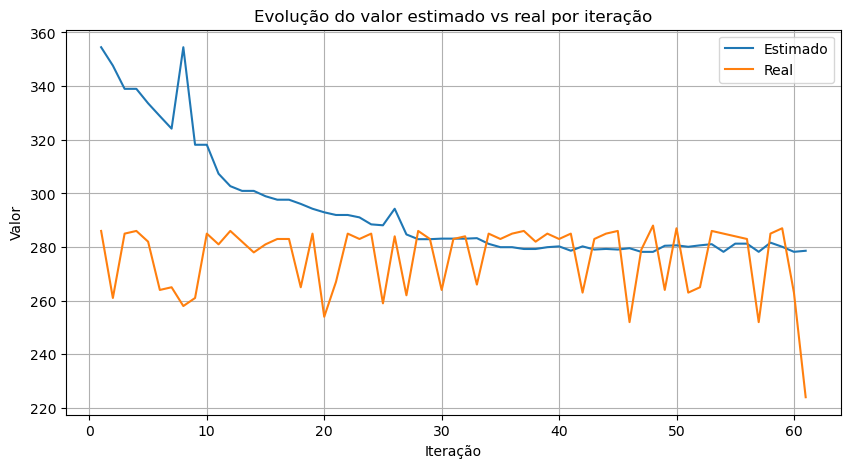

In [76]:
plt.figure(figsize=(10,5))
plt.plot(df['iteration'], df['estimated_value'], label='Estimado')
plt.plot(df['iteration'], df['actual_value'], label='Real')
plt.xlabel('Iteração')
plt.ylabel('Valor')
plt.title('Evolução do valor estimado vs real por iteração')
plt.legend()
plt.grid(True)
plt.show()


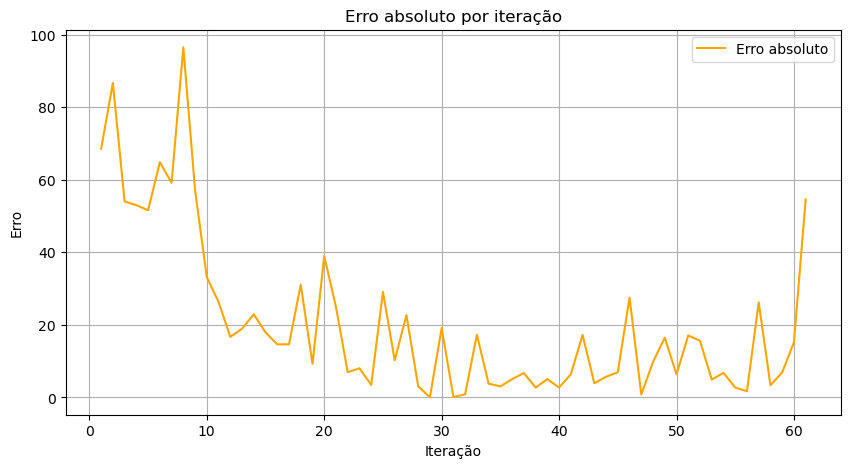

In [77]:
plt.figure(figsize=(10,5))
plt.plot(df['iteration'], df['abs_error'], color='orange', label='Erro absoluto')
plt.xlabel('Iteração')
plt.ylabel('Erro')
plt.title('Erro absoluto por iteração')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
X = df['iteration'].values.reshape(-1, 1)
y = df['abs_error'].values
reg = LinearRegression().fit(X, y)

print(f"Inclinação da tendência do erro: {reg.coef_[0]:.4f}")

Inclinação da tendência do erro: -0.7540


In [79]:
corr = df['estimated_value'].corr(df['actual_value'])
print(f"Correlação entre estimado e real: {corr:.3f}")

Correlação entre estimado e real: -0.049


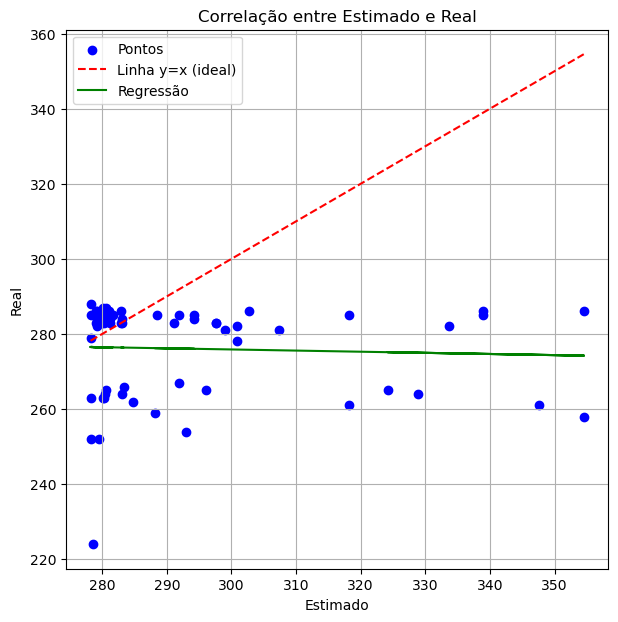

In [80]:
# %% Gráfico de correlação estimado vs real
plt.figure(figsize=(7,7))
plt.scatter(df['estimated_value'], df['actual_value'], color='blue', label='Pontos')
plt.plot([df['estimated_value'].min(), df['estimated_value'].max()],
         [df['estimated_value'].min(), df['estimated_value'].max()],
         color='red', linestyle='--', label='Linha y=x (ideal)')

# Linha de regressão
X_vals = df['estimated_value'].values.reshape(-1,1)
y_vals = df['actual_value'].values
reg2 = LinearRegression().fit(X_vals, y_vals)
plt.plot(df['estimated_value'], reg2.predict(X_vals), color='green', linestyle='-', label='Regressão')

plt.xlabel('Estimado')
plt.ylabel('Real')
plt.title('Correlação entre Estimado e Real')
plt.legend()
plt.grid(True)
plt.show()
